Date: 19.05.2023 \
Author: Reto Hendry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = ["feature_importance_h2o.csv", "feature_importance_pycaret.csv", "feature_importance_tpot.csv"]

# Read and store dataframes
df_list = [pd.read_csv(file) for file in file_paths]

# Rename 'Scaled_Importance' column to include file origin
for df, path in zip(df_list, file_paths):
    df.rename(columns={'Scaled_Importance': 'Scaled_Importance_' + path.split('_')[2].split('.')[0]}, inplace=True)
    df.drop(columns=['Percentage', 'Relative_Importance'], inplace=True)


In [9]:
# Merge dataframes on 'Feature' column
df_merged = df_list[0].merge(df_list[1], on='Feature', how='outer').merge(df_list[2], on='Feature', how='outer')
df_merged

# set the index to 'Feature' column
df_merged = df_merged.set_index('Feature')

# Add mean of scaled importance
df_merged['Scaled_Importance_Mean'] = df_merged.mean(axis=1)

# save to csv
df_merged.to_csv('feature_importance_merged.csv')

df_merged

,Scaled_Importance_h2o,Scaled_Importance_pycaret,Scaled_Importance_tpot,Scaled_Importance_Mean
Feature,,,,
16748,0.002234,0.309468,0.218379,0.176694
17987,0.008037,0.072295,0.051904,0.044079
18756,0.008288,0.068438,0.147108,0.074611
16560,0.008501,0.438866,0.125286,0.190885
17738,0.013573,0.120949,0.403059,0.179194
...,...,...,...,...
11105,0.558790,0.570562,0.423696,0.517682
6424,0.565678,0.734513,0.524445,0.608212
9689,0.685253,1.000000,0.499932,0.728395


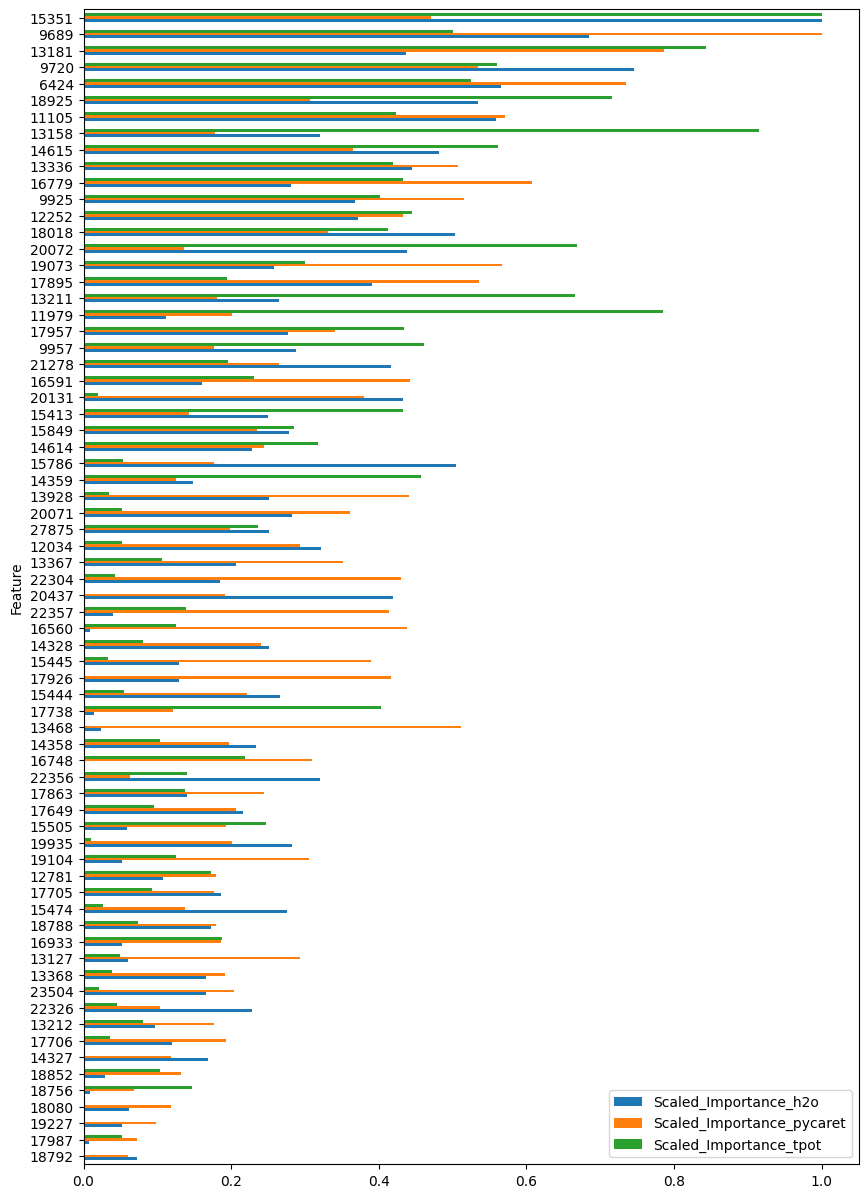

In [8]:
# Sort by mean of scaled importance
df_plot = df_merged.sort_values(by='Scaled_Importance_Mean', ascending=True)

# drop the mean column
df_plot = df_plot.drop(columns=['Scaled_Importance_Mean'])

df_plot

# create a bar plot
df_plot.plot(kind='barh', figsize=(10, 15))
plt.show()

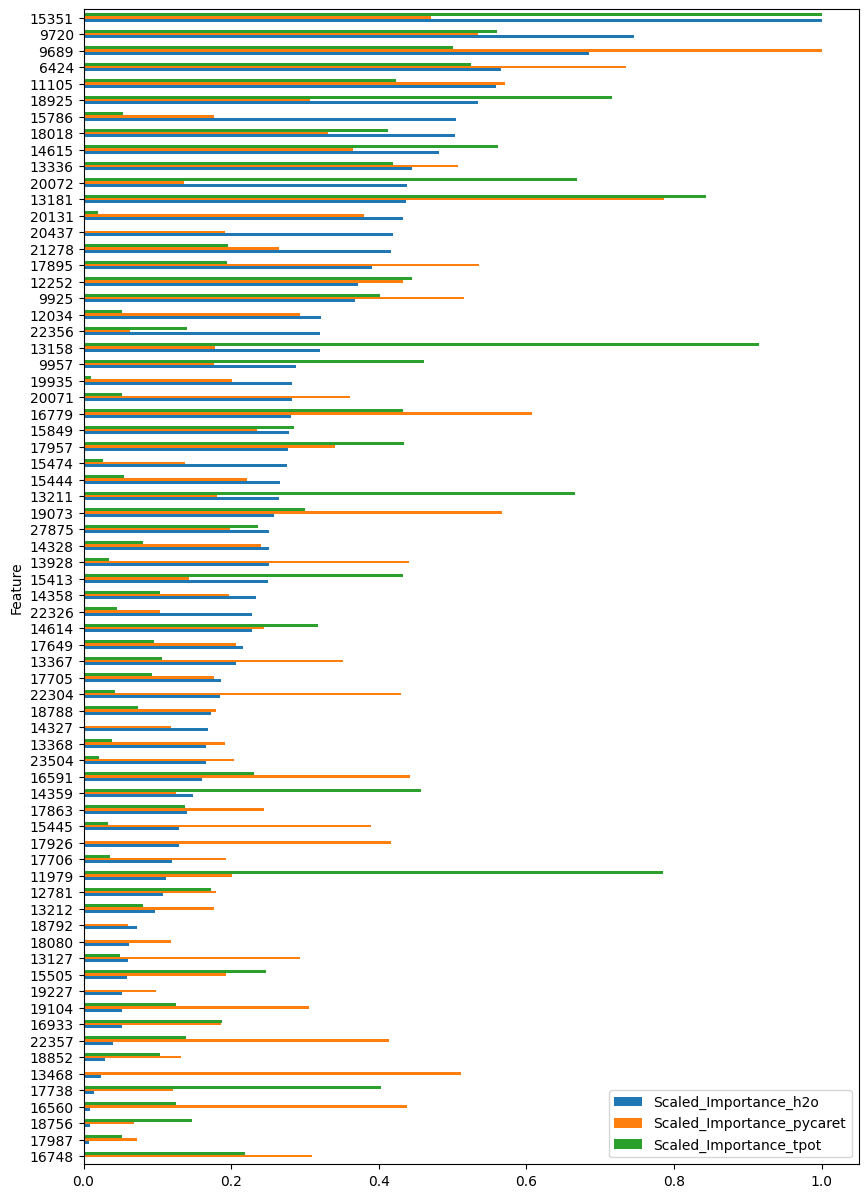

In [11]:
# Sort by mean of scaled importance
df_plot = df_merged.sort_values(by='Scaled_Importance_h2o', ascending=True)

# drop the mean column
df_plot = df_plot.drop(columns=['Scaled_Importance_Mean'])

df_plot

# create a bar plot
df_plot.plot(kind='barh', figsize=(10, 15))
plt.show()

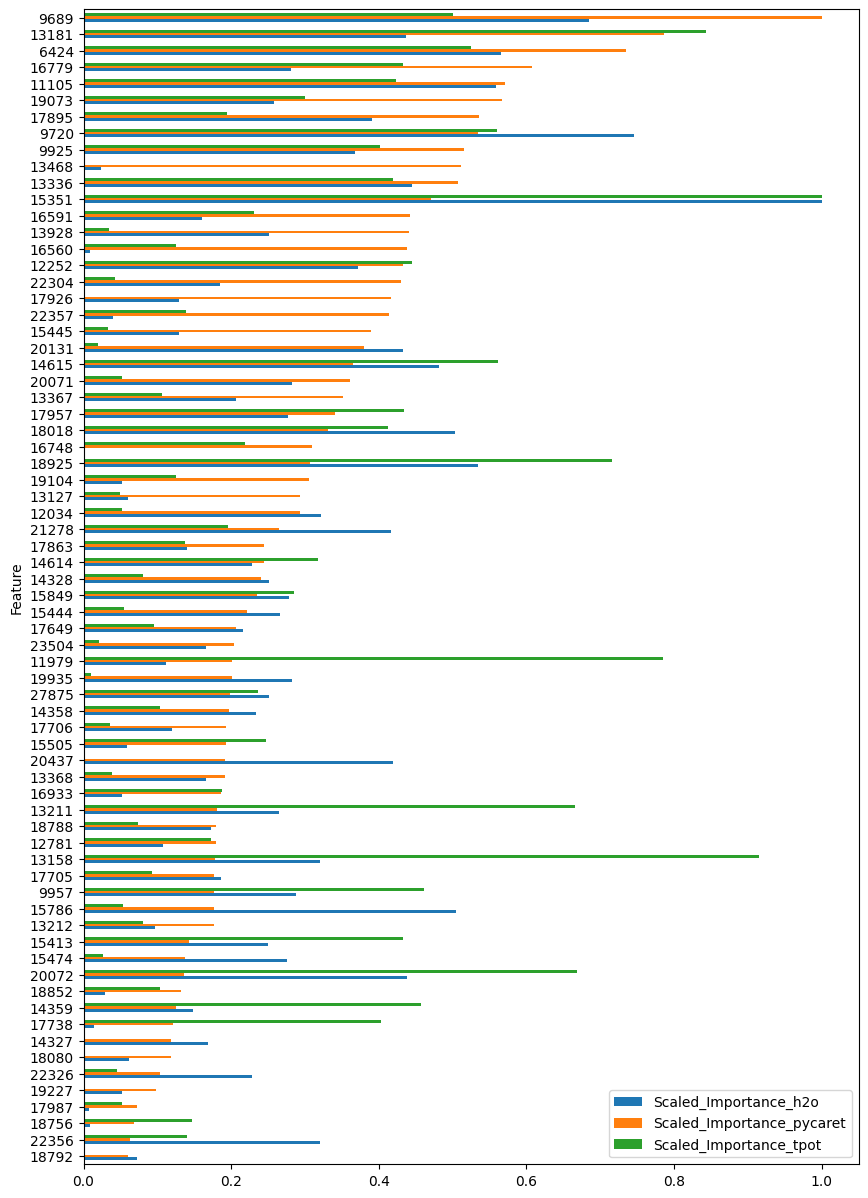

In [12]:
# Sort by mean of scaled importance
df_plot = df_merged.sort_values(by='Scaled_Importance_pycaret', ascending=True)

# drop the mean column
df_plot = df_plot.drop(columns=['Scaled_Importance_Mean'])

df_plot

# create a bar plot
df_plot.plot(kind='barh', figsize=(10, 15))
plt.show()

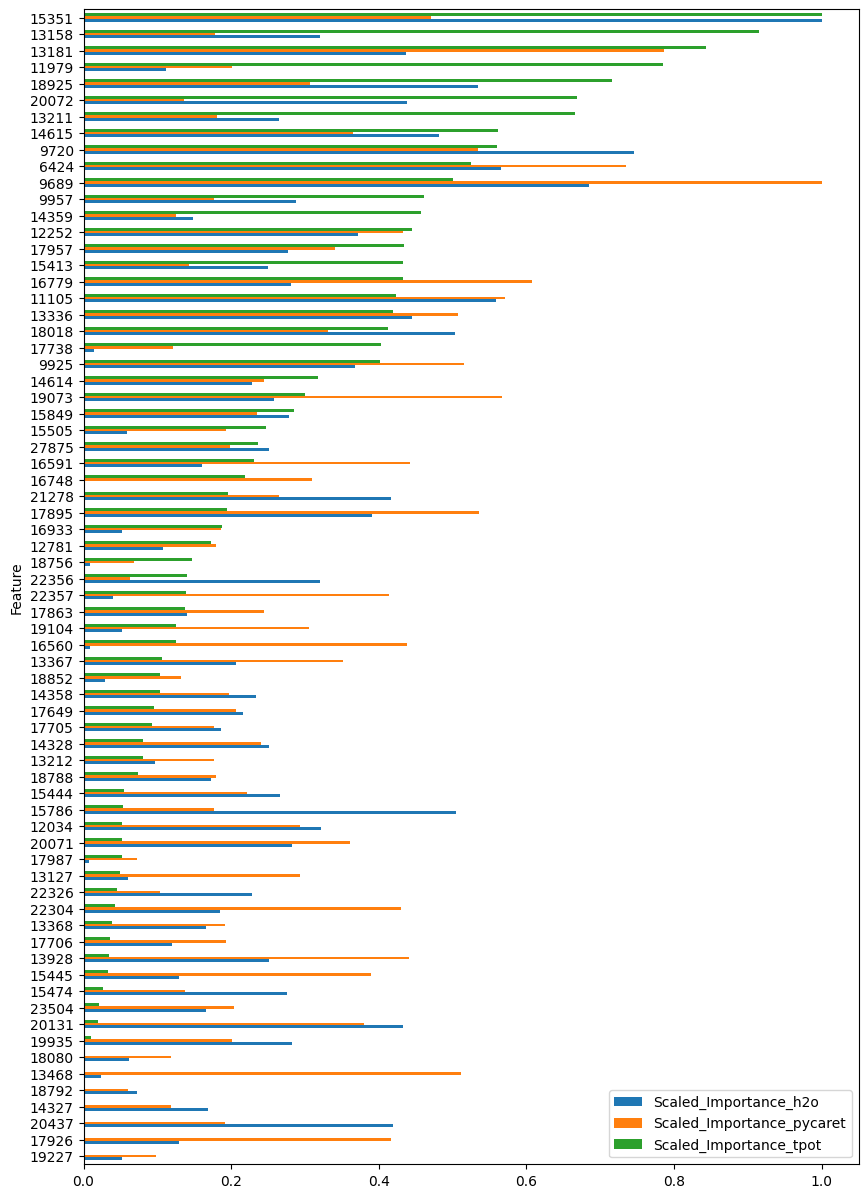

In [13]:
# Sort by mean of scaled importance
df_plot = df_merged.sort_values(by='Scaled_Importance_tpot', ascending=True)

# drop the mean column
df_plot = df_plot.drop(columns=['Scaled_Importance_Mean'])

df_plot

# create a bar plot
df_plot.plot(kind='barh', figsize=(10, 15))
plt.show()